# Librerías

In [6]:
import cv2 as cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# **Sklearn**

(1013, 1800, 3)


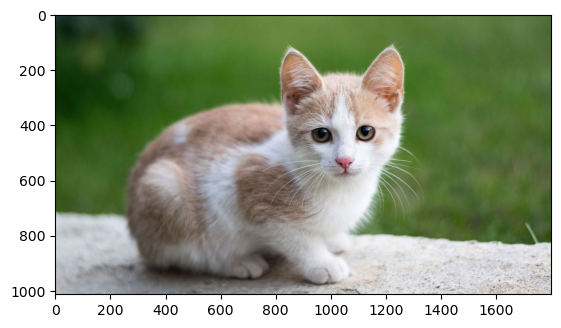

In [15]:
img = cv2.imread("Gato.jpg")

img = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1)
print(img.shape)

In [19]:
# Flatten Each channel of the Image
img_array  = img.reshape((-1,3))
print(img_array.shape)

(1823400, 3)


## k-means

In [20]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(img_array)
kmeans

KMeans(n_clusters=4, random_state=0)

In [21]:
centers = kmeans.cluster_centers_
print(centers)

[[ 58.46357201 109.70498392  87.06306343]
 [212.69825929 210.72491155 212.89275364]
 [139.13601982 144.52159472 154.34094561]
 [ 26.697276    75.79377047  45.26583001]]


In [22]:
centers = np.array(centers,dtype='uint8')
centers

array([[ 58, 109,  87],
       [212, 210, 212],
       [139, 144, 154],
       [ 26,  75,  45]], dtype=uint8)

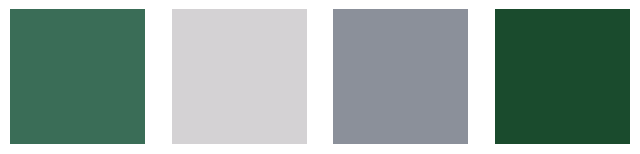

In [23]:
i = 1

plt.figure(0,figsize=(8,2))

# Storing info in color array
colors = []

for each_col in centers:
    plt.subplot(1,4,i)
    plt.axis("off")
    i+=1

    colors.append(each_col)

    # Color Swatch
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)


In [24]:
new_img = np.zeros((1013*1800,3),dtype='uint8')
print(new_img.shape)

(1823400, 3)


In [25]:
colors

[array([ 58, 109,  87], dtype=uint8),
 array([212, 210, 212], dtype=uint8),
 array([139, 144, 154], dtype=uint8),
 array([26, 75, 45], dtype=uint8)]

In [26]:
kmeans.labels_

array([3, 3, 3, ..., 1, 1, 1])

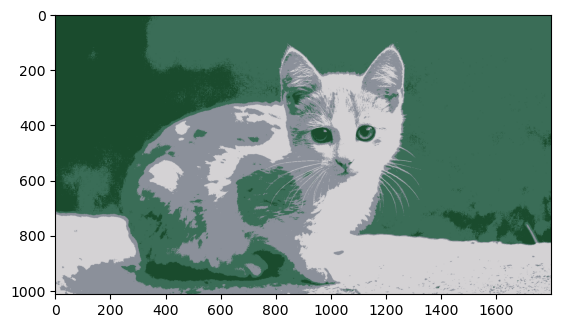

In [30]:
# Iterate over the image
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[kmeans.labels_[ix]]

new_img = new_img.reshape((img.shape))
plt.imshow(new_img)
plt.show()

# **CV2**

## K-means clustering

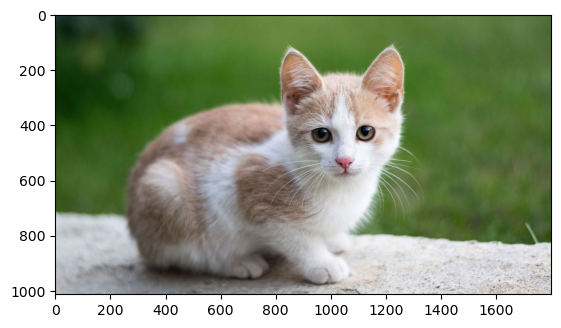

In [32]:

img2 = cv2.imread('Gato.jpg')
Z = img.reshape((-1,3))


img2 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img2)

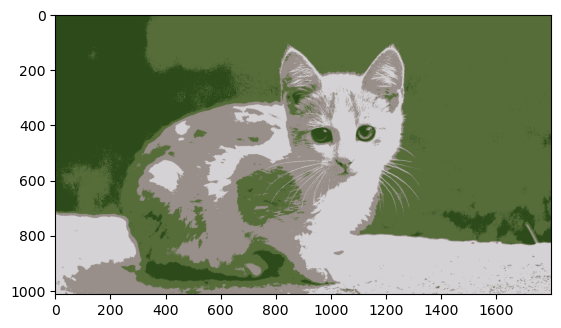

In [33]:
img2 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 4
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img2.shape))
res2 = cv2.cvtColor(res2,cv2.COLOR_BGR2RGB)

plt.imshow(res2)